In [16]:
import pandas as pd
import random
import datetime

# Create synthetic patient data
n_patients = 1000
patient_ids = range(1, n_patients + 1)
ages = [random.randint(40, 85) for _ in range(n_patients)]
genders = [random.choice(["Male", "Female"]) for _ in range(n_patients)]

# Create synthetic clinical symptoms data
clinical_symptoms = [
    list(set(random.choices(["Chest Pain", "Cough", "Hemoptysis"], k=random.randint(1, 3)))
    ) for _ in range(n_patients)
]

# Define a mapping of symptoms to treatment modalities
symptom_to_treatment_mapping = {
    "Cough": ["Radiation Therapy"],
    "Chest Pain": ["Surgery", "Chemotherapy"],
    "Hemoptysis": ["Surgery", "Radiation Therapy"]
}

# Create synthetic treatment modalities based on symptoms
treatment_modalities = []
for symptoms in clinical_symptoms:
    modalities = set()
    for symptom in symptoms:
        if symptom in symptom_to_treatment_mapping:
            modalities.update(symptom_to_treatment_mapping[symptom])
    treatment_modalities.append(list(modalities))

# Create synthetic cancer data
tumor_sizes = [round(random.uniform(0.1, 9), 2) for _ in range(n_patients)]
cancer_stages = ["T1" if size <3 else "T2" if size <= 7 else "T3" for size in tumor_sizes]
histological_grades = [random.choice(["G1", "G2", "G3"]) for _ in range(n_patients)]

# Create synthetic survival and follow-up data with unique labels
diagnosis_date = [datetime.date(random.randint(2010, 2022), random.randint(1, 12), random.randint(1, 28)) for _ in range(n_patients)]
treatment_start_date = [diagnosis_date[i] + datetime.timedelta(days=random.randint(1, 365)) for i in range(n_patients)]
treatment_end_date = [treatment_start_date[i] + datetime.timedelta(days=random.randint(1, 365)) for i in range(n_patients)]
follow_up_date = [treatment_end_date[i] + datetime.timedelta(days=random.randint(30, 365)) for i in range(n_patients)]
survival_status = [random.choice(["Dead", "Survived"]) for _ in range(n_patients)]

# Create a synthetic DataFrame
data = {
    "Patient_ID": patient_ids,
    "Age": ages,
    "Gender": genders,
    "Clinical_Symptoms": clinical_symptoms,
    "Treatment_Modalities": treatment_modalities,
    "Cancer_Stage": cancer_stages,
    "Tumor_Size": tumor_sizes,
    "Histological_Grade": histological_grades,
    "Diagnosis_Date": diagnosis_date,
    "Treatment_Start_Date": treatment_start_date,
    "Treatment_End_Date": treatment_end_date,
    "Follow_Up_Date": follow_up_date,
    "Survival_Status": survival_status,
}

df = pd.DataFrame(data)

# Save the synthetic data to a CSV file
df.to_csv("synthetic_lung_cancer_data.csv", index=False)

In [17]:
df.tail()

,Patient_ID,Age,Gender,Clinical_Symptoms,Treatment_Modalities,Cancer_Stage,Tumor_Size,Histological_Grade,Diagnosis_Date,Treatment_Start_Date,Treatment_End_Date,Follow_Up_Date,Survival_Status
995,996,85,Male,"[Hemoptysis, Cough]","[Surgery, Radiation Therapy]",T2,4.06,G2,2010-10-22,2011-07-30,2011-11-30,2012-09-25,Survived
996,997,67,Male,[Chest Pain],"[Surgery, Chemotherapy]",T2,5.27,G3,2019-04-07,2020-01-13,2020-03-13,2021-03-05,Survived
997,998,48,Male,"[Hemoptysis, Cough]","[Surgery, Radiation Therapy]",T2,4.10,G2,2010-12-20,2011-06-01,2011-06-25,2011-12-03,Dead
998,999,75,Male,"[Hemoptysis, Cough]","[Surgery, Radiation Therapy]",T3,8.82,G3,2019-06-16,2020-02-23,2020-12-09,2021-05-15,Survived
999,1000,81,Female,[Hemoptysis],"[Surgery, Radiation Therapy]",T2,5.78,G3,2010-06-03,2010-07-22,2010-08-08,2010-09-18,Dead


In [18]:
# we will write notes on lung cancer.
#we will also put our synthetic data code, explain the column names.
#T grade converting to only T1 and T2.
#prepare a scatter plot and show outliers.
#build a logistic regression for t1 and t2 based on tumor size.
#split data into train, test and find its performance and accuracy score.
#also build a knn-classifier.(clusters of t1 and t2)
#any two models should be implemented.
#conclusion.
#type of treatment.
#mostly focussing on classification.
#overall basic classification model with most accuracy and prediction.
#preparing a document, ppt on the steps.
#explaining classification and its importance.
#treatement methodologies.
#


In [19]:
df.describe()

,Patient_ID,Age,Tumor_Size
count,1000.000000,1000.000000,1000.00000
mean,500.500000,62.852000,4.61753
std,288.819436,13.301317,2.56646
min,1.000000,40.000000,0.14000
25%,250.750000,51.000000,2.37750
50%,500.500000,63.000000,4.64500
75%,750.250000,75.000000,6.87250
max,1000.000000,85.000000,8.98000


In [20]:
df.shape

(1000, 13)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient_ID            1000 non-null   int64  
 1   Age                   1000 non-null   int64  
 2   Gender                1000 non-null   object 
 3   Clinical_Symptoms     1000 non-null   object 
 4   Treatment_Modalities  1000 non-null   object 
 5   Cancer_Stage          1000 non-null   object 
 6   Tumor_Size            1000 non-null   float64
 7   Histological_Grade    1000 non-null   object 
 8   Diagnosis_Date        1000 non-null   object 
 9   Treatment_Start_Date  1000 non-null   object 
 10  Treatment_End_Date    1000 non-null   object 
 11  Follow_Up_Date        1000 non-null   object 
 12  Survival_Status       1000 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 101.7+ KB


In [22]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Clinical_Symptoms,0
Treatment_Modalities,0
Cancer_Stage,0
Tumor_Size,0
Histological_Grade,0
Diagnosis_Date,0
Treatment_Start_Date,0


In [23]:
df.drop(columns=['Patient_ID','Follow_Up_Date'],axis=1,inplace=True)
df.dtypes

,0
Age,int64
Gender,object
Clinical_Symptoms,object
Treatment_Modalities,object
Cancer_Stage,object
Tumor_Size,float64
Histological_Grade,object
Diagnosis_Date,object
Treatment_Start_Date,object
Treatment_End_Date,object


In [24]:
df['Cancer_Stage'] = df['Cancer_Stage'].astype(float, errors='ignore')
df['Cancer_Stage']

,Cancer_Stage
0,T3
1,T3
2,T2
3,T2
4,T2
...,...
995,T2
996,T2
997,T2
998,T3


In [25]:
print(df.groupby('Cancer_Stage').size())

Cancer_Stage
T1    314
T2    451
T3    235
dtype: int64


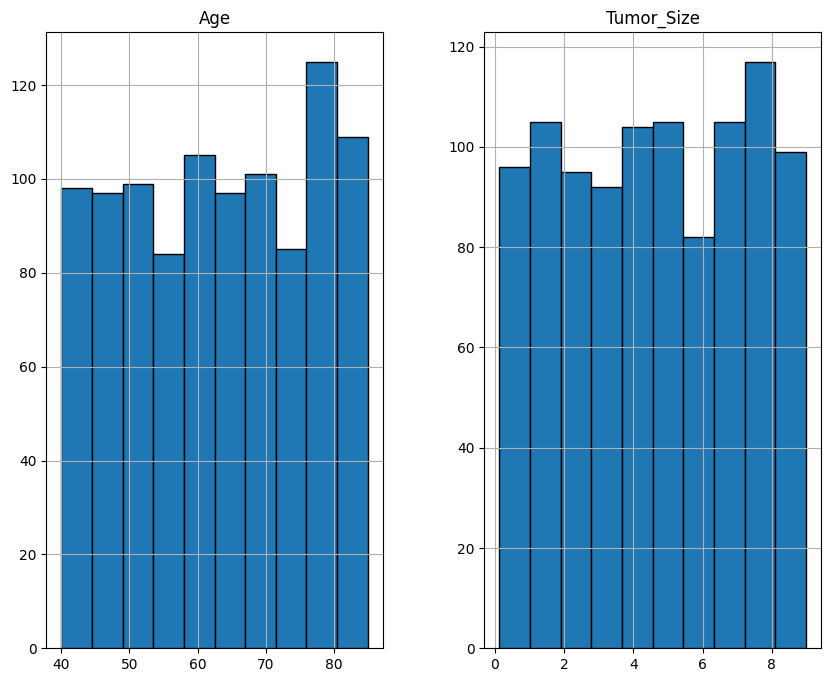

In [26]:
import matplotlib.pyplot as plt
df.hist(edgecolor= 'black',figsize=(10,8))
plt.show()

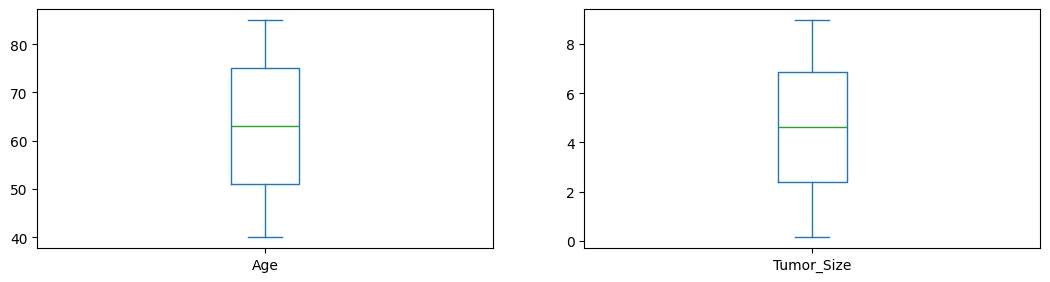

In [27]:
df.plot(kind="box", subplots=True, layout=(5,3), sharex=False, figsize=(20,18))
plt.show()

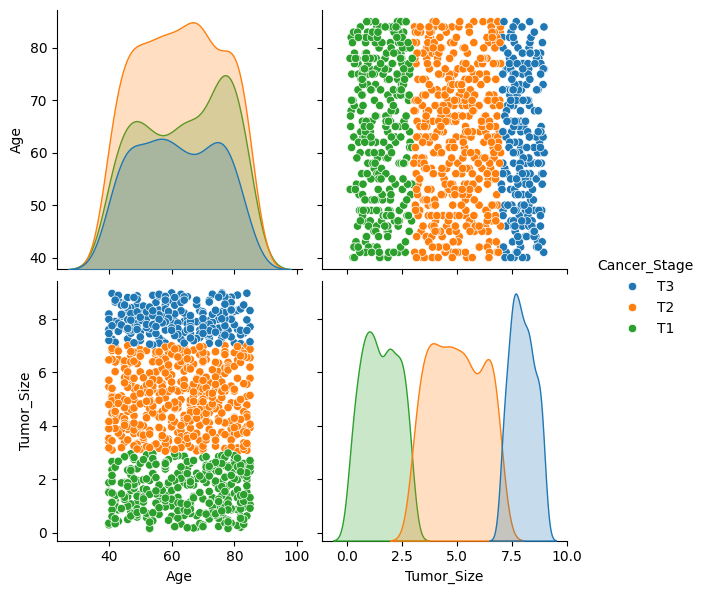

In [28]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, hue='Cancer_Stage', height=3, aspect= 1);

In [29]:
from sklearn.model_selection import train_test_split
import pandas as pd
correlation_of_matrix = df.select_dtypes(include=['number']).corr()
print(correlation_of_matrix)



                 Age  Tumor_Size
Age         1.000000   -0.056133
Tumor_Size -0.056133    1.000000


In [30]:
from sklearn.model_selection import train_test_split
X=df['Tumor_Size'].values.reshape(-1, 1)
Y=df['Cancer_Stage'].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
random_state=1503)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

LG_model = LogisticRegression(random_state=1503, max_iter=1000)

LG_model.fit(X_train, np.ravel(Y_train))

predicted = LG_model.predict(X_test)
report = classification_report(Y_test, predicted)
print("Classification Report: ", "\n", "\n",report)

Classification Report:  
 
               precision    recall  f1-score   support

          T1       1.00      1.00      1.00        99
          T2       1.00      1.00      1.00       136
          T3       1.00      1.00      1.00        65

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [32]:
result = LG_model.score(X_test, Y_test)
print("Accuracy:",result)

Accuracy: 1.0


In [33]:
LG_model.predict([[3.8]])
LG_model.predict([[6.5]])

array(['T2'], dtype=object)

<ipython-input-34-65ea9c9af05b>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


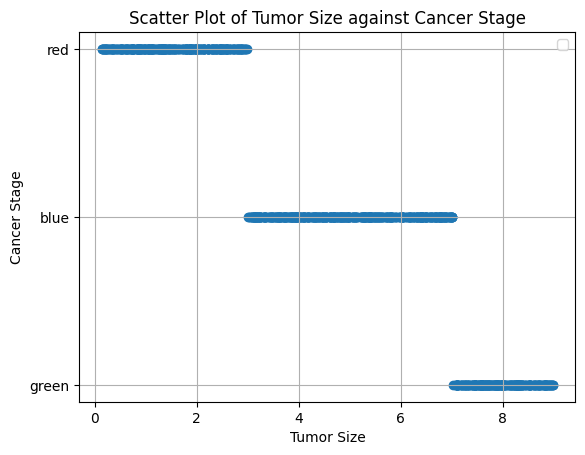

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
colors = {'T1': 'red', 'T2': 'blue', 'T3': 'green'}
plt.scatter(df['Tumor_Size'], df['Cancer_Stage'].map(colors))
plt.title('Scatter Plot of Tumor Size against Cancer Stage')
plt.xlabel('Tumor Size')
plt.ylabel('Cancer Stage')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

X=df['Tumor_Size'].values.reshape(-1, 1)
Y=df['Cancer_Stage'].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
random_state=1503)

In [36]:
# KNN Model:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, np.ravel(Y_train))
predicted = KNN_model.predict(X_test)
report = classification_report(Y_test, predicted)
print("Classification Report: ", "\n", "\n", report)

Classification Report:  
 
               precision    recall  f1-score   support

          T1       1.00      1.00      1.00        99
          T2       1.00      1.00      1.00       136
          T3       1.00      1.00      1.00        65

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [37]:
result =KNN_model.score(X_test, Y_test)
print("Accuracy:",result)

Accuracy: 1.0


In [38]:
KNN_model.predict([[1.5]])

array(['T1'], dtype=object)

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#validating the data
n_splits = 10
seed = 7
kfold = KFold(n_splits, random_state=seed, shuffle=True)
scoring = 'accuracy'
results = cross_val_score(KNN_model, X,np.ravel(Y), cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.998 (0.004)


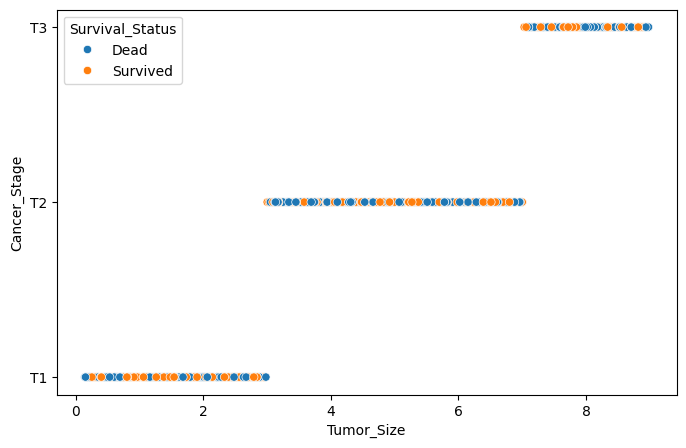

In [40]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))  # Set the figure size
sns.scatterplot(x='Tumor_Size', y='Cancer_Stage', data=df, hue='Survival_Status')
plt.show()

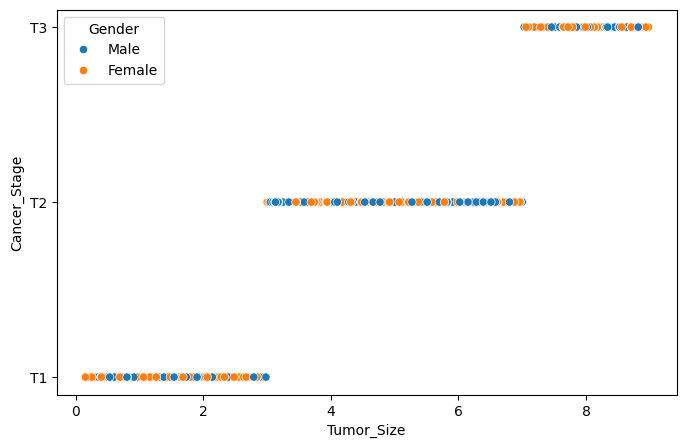

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))  # Set the figure size
sns.scatterplot(x='Tumor_Size', y='Cancer_Stage', data=df, hue='Gender')
plt.show()

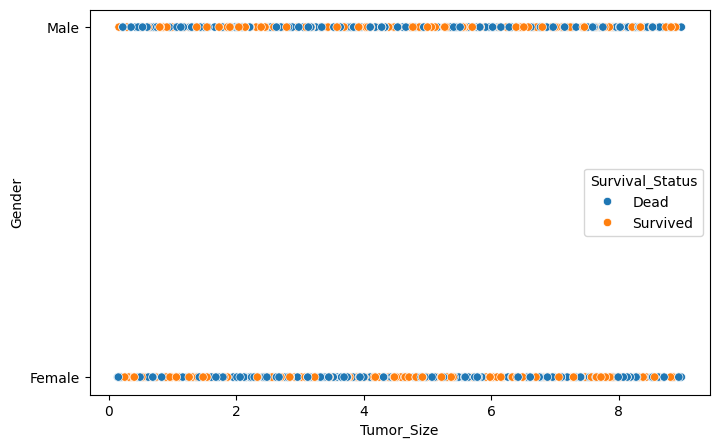

,Survival_Status
count,1000
unique,2
top,Dead
freq,506


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))  # Set the figure size
sns.scatterplot(x='Tumor_Size', y='Gender', data=df, hue='Survival_Status')
plt.show()
df['Survival_Status'].describe()